# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

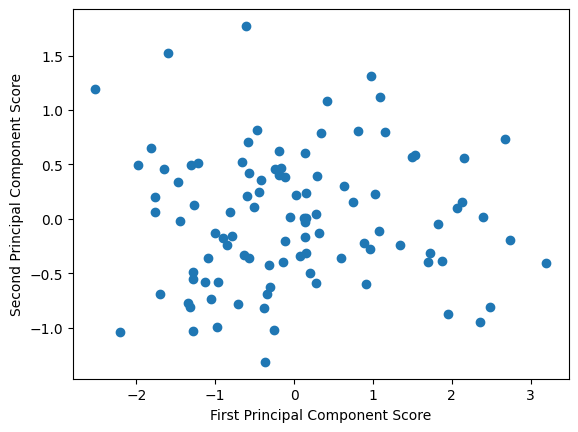

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

In [ ]:
# PCA component directions: The first principal component likely captures the overall level of series_1, series_2, and series_3, since all are positively correlated with series_1.

# The second component captures the variation orthogonal to the first — likely dominated by the more variable series_3 (because it had more noise in its creation).

# The outliers: Have low scores on PC1, meaning they have low overall values across all three series.
# Have high scores on PC2, meaning their series_3 is high relative to series_1 and series_2

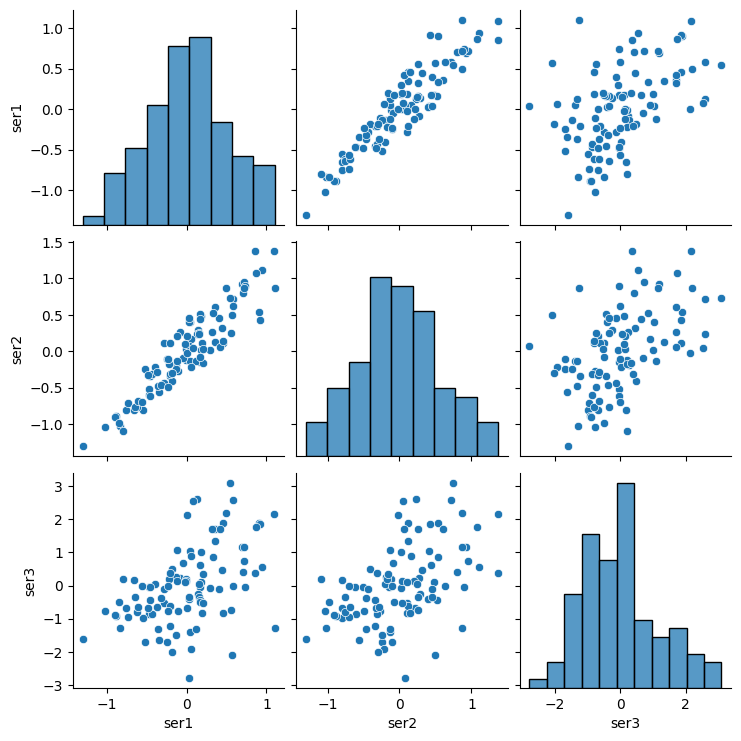

In [2]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [ ]:
# Advantages:

# Dimensionality reduction — compresses 3D data into 2D, capturing most variance.

# Highlights outliers or structure (e.g., the three outliers with unusual series_3 values).

# Shows relationships and clusters in a compact form.


# Disadvantages:

# Loss of interpretability — the axes (PC1, PC2) are combinations of all variables, so we can’t directly say what’s happening to series_1, etc.

# If components are not well-separated, the plot may be hard to interpret.

# Relative scaling of features affects PCA unless data is normalized (mean-centered here, but not variance-scaled).

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

/tmp/ipykernel_7834/1104660186.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_df = numeric_df.applymap(lambda x: str(x).replace(",", "") if pd.notnull(x) else x)


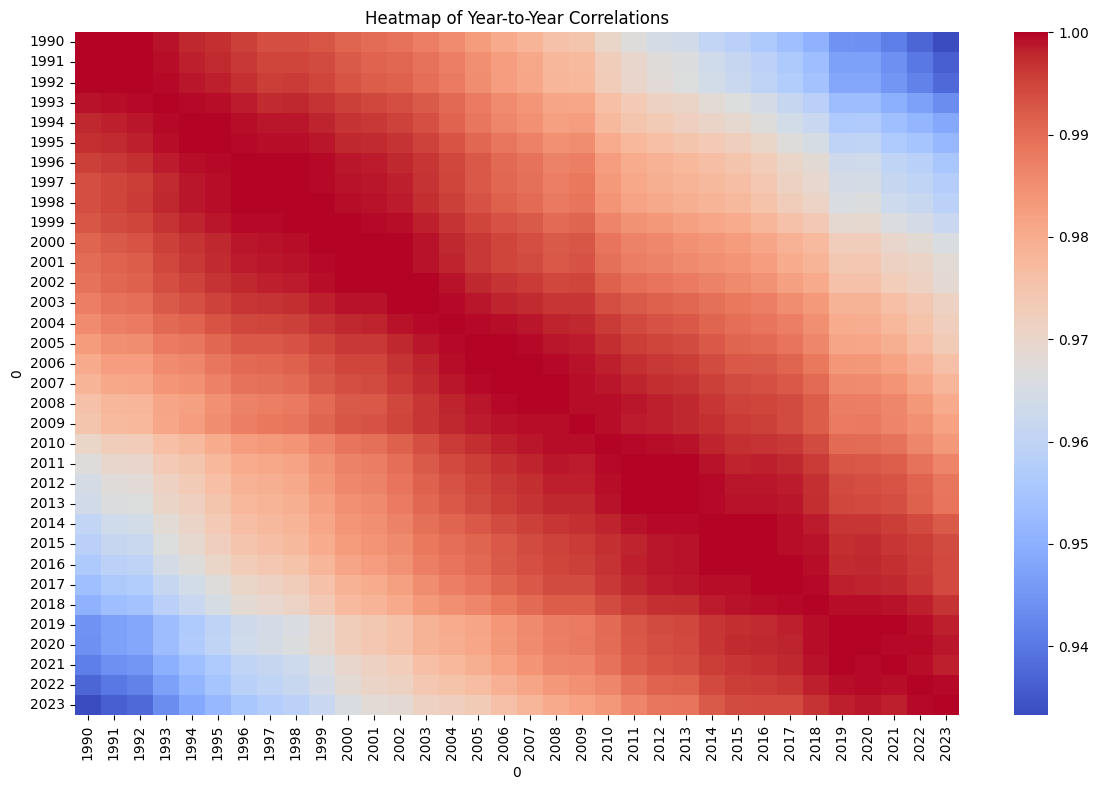

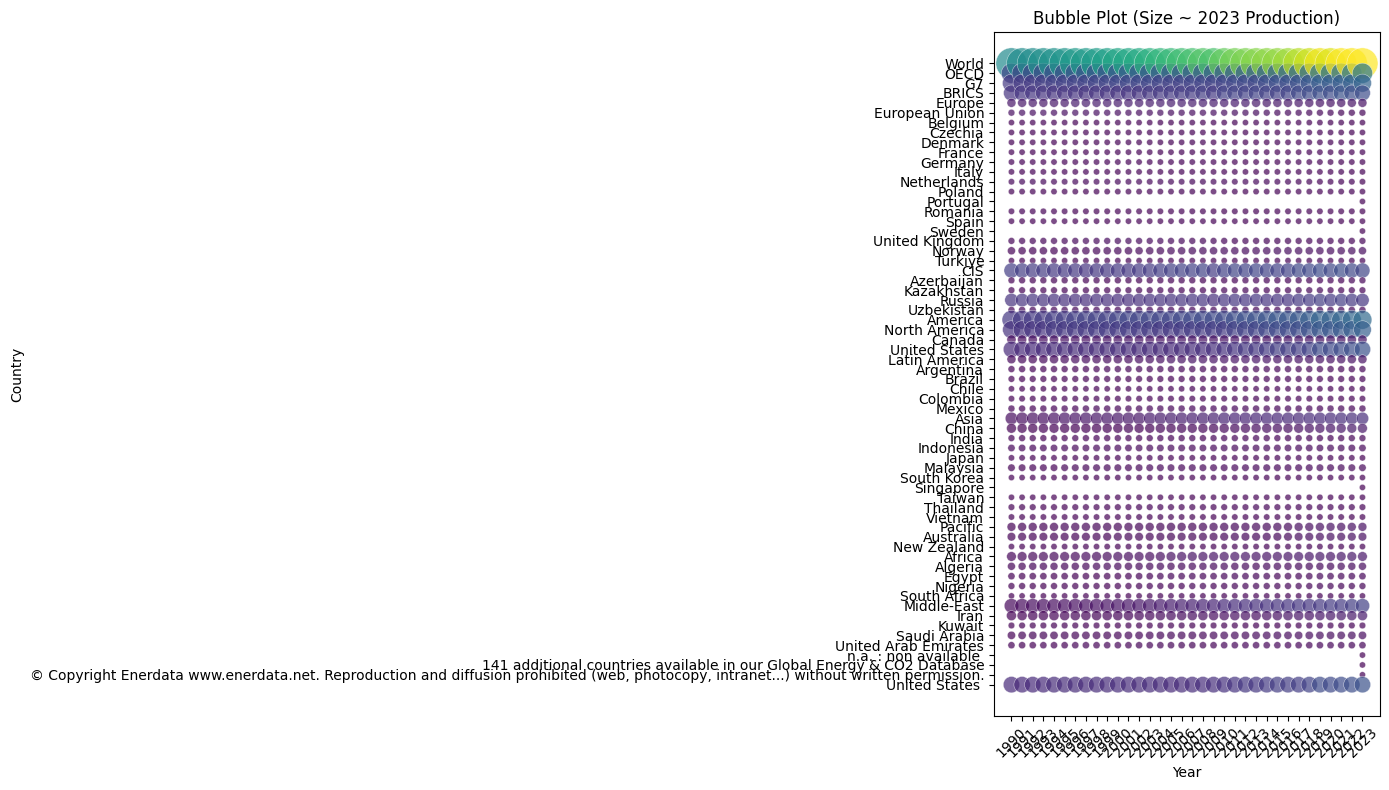

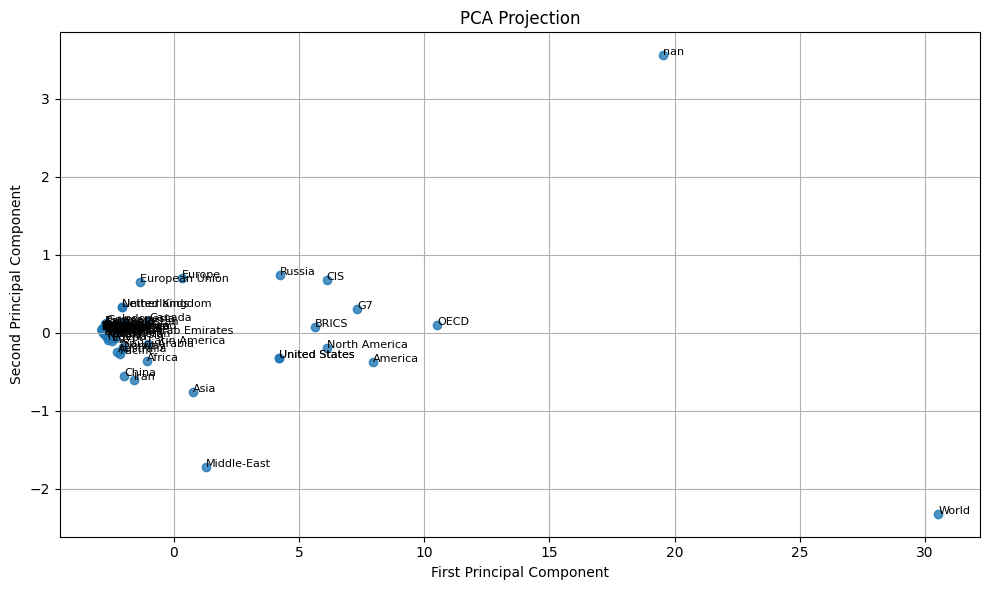


Explained Variance by PCA: [0.98555793 0.01266652]

Regression Coefficients:
 0
2006    10.145764
2008     6.459645
2015     3.131568
2001     3.038513
2011     2.456943
2014     1.325302
2002     0.893462
2010    -0.181462
2009    -0.451954
2003    -0.518732
2000    -0.806985
2012    -2.901360
2013    -3.387395
2005    -3.743300
2004    -5.591753
2007    -8.865866
dtype: float64

R² for 2023 Prediction: 0.9998607362691754


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# === Load and Clean Data ===
df = pd.read_csv("NGP.csv", encoding='latin1', skiprows=4)
df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)
df = df.dropna(axis=1, how='all')
df.columns.values[0] = "Country"
country_names = df["Country"]
numeric_df = df.loc[:, "1990":"2023"].replace("n.a.", np.nan)
numeric_df = numeric_df.applymap(lambda x: str(x).replace(",", "") if pd.notnull(x) else x)
numeric_df = numeric_df.astype(float)


def plot_heatmap(df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
    plt.title("Heatmap of Year-to-Year Correlations")
    plt.tight_layout()
    plt.show()


def plot_bubble(df, country_names):
    df["Country"] = country_names
    df["2023"] = df["2023"].fillna(0)
    melted = df.melt(id_vars="Country", var_name="Year", value_name="Production")
    melted["Production"] = melted["Production"].astype(float)
    melted = melted.merge(df[["Country", "2023"]], on="Country", suffixes=("", "_2023"))

    plt.figure(figsize=(14, 8))
    sns.scatterplot(data=melted, x="Year", y="Country", size="2023", hue="Production",
                    sizes=(20, 500), palette="viridis", legend=False, alpha=0.7)
    plt.title("Bubble Plot (Size ~ 2023 Production)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def plot_pca(df, country_names):
    df = df.dropna(thresh=20).dropna(axis=1)
    scaler = StandardScaler()
    scaled = scaler.fit_transform(df)

    pca = PCA(n_components=2)
    components = pca.fit_transform(scaled)

    plt.figure(figsize=(10, 6))
    plt.scatter(components[:, 0], components[:, 1], alpha=0.8)
    for i, label in enumerate(country_names[df.index]):
        plt.text(components[i, 0], components[i, 1], label, fontsize=8)
    plt.xlabel("First Principal Component")
    plt.ylabel("Second Principal Component")
    plt.title("PCA Projection")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return pca.explained_variance_ratio_


def regression_analysis(df):
    X = df.loc[:, "2000":"2015"]
    y = df["2023"]
    valid = X.dropna().index.intersection(y.dropna().index)
    X, y = X.loc[valid], y.loc[valid]

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    return pd.Series(model.coef_, index=X.columns), r2


plot_heatmap(numeric_df)
plot_bubble(numeric_df.copy(), country_names)
explained = plot_pca(numeric_df.copy(), country_names)
regression_results, r2_val = regression_analysis(numeric_df)


print("\nExplained Variance by PCA:", explained)
print("\nRegression Coefficients:\n", regression_results.sort_values(ascending=False))
print("\nR² for 2023 Prediction:", r2_val)


In [ ]:
# Heatmap
# The matrix shows very strong positive correlations (mostly > 0.95) between all years
# This suggests that regions producing more gas in one year tend to produce more the next year, i.e., consistent production trends over time.
# The highest correlations occur between adjacent or close years, with mild decreases as the gap between years increases

In [ ]:
# Bubble Plot 
# Larger producers in 2023 (e.g., United States, Russia, China) are shown with larger bubbles.
# You can spot sustained growth, declines, or volatility by looking at the bubble spread and hue.




In [ ]:
# PCA Plot 
# Countries far to the right (like World) have high overall production
# Countries clustered around the origin have similar, lower, or average production levels.
# PC2 only adds a tiny bit of extra separation, so 1D projection captures nearly everything.




In [ ]:
# Linear regression
# R² = 0.99986 — excellent fit. This means the model explains 99.986% of the variance in 2023 production.

# The most influential years (largest coefficients):

# 2006 (positive influence)

# 2007 (strong negative influence)

# 2008, 2001, 2015 also show strong effects.

# There’s strong temporal coherence — past production (especially from the 2000s) can accurately predict future levels.

# This reflects how gas production tends to evolve steadily, barring major shocks.



# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

In [ ]:
# I tried to reproduce the graph from page 143, figure 5.8

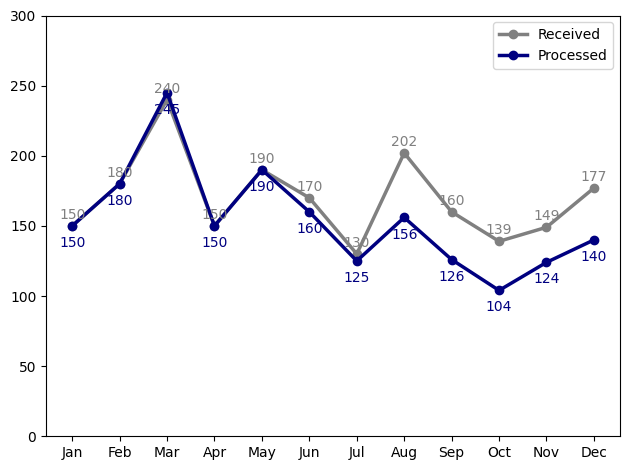

In [7]:
import matplotlib.pyplot as plt


months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
          'Sep', 'Oct', 'Nov', 'Dec']
received = [150, 180, 240, 150, 190, 170, 130, 202, 160, 139, 149, 177]
processed = [150, 180, 245, 150, 190, 160, 125, 156, 126, 104, 124, 140]


plt.plot(months, received, 'o-', label='Received', color='gray', linewidth=2.5)
plt.plot(months, processed, 'o-', label='Processed', color='navy', linewidth=2.5)


for i in range(len(months)):
    plt.text(i, received[i] + 5, str(received[i]), ha='center', color='gray')
    plt.text(i, processed[i] - 15, str(processed[i]), ha='center', color='navy')


plt.ylim(0, 300)
plt.legend()
plt.tight_layout()
plt.show()
